## **Prétraiement**

### **Identic Columns**

In [ ]:
def get_rate_IV(df_train_complete):
  nbr=df_train_complete.shape[0]
  df_col_elim =pd.DataFrame()
  for i in range(df_train_complete.shape[1]):
    max_rate_IV= ((df_train_complete.iloc[:,i].value_counts()).max())/nbr
    df_col_elim=df_col_elim.append({"Column":df_train_complete.columns[i],"Rate_M_IV":max_rate_IV},ignore_index=True)##
  return df_col_elim

def eliminate_rate_IV(df_train_complete,df_test_complete):
  df_col_elim = get_rate_IV(df_train_complete)
  #print(df_col_elim[df_col_elim["Rate_M_IV" ]> 0.99])
  df_col_elim2= get_rate_IV(df_test_complete)
  #print(df_col_elim2[df_col_elim2["Rate_M_IV" ]> 0.99])
  int_df = pd.merge(df_col_elim[df_col_elim["Rate_M_IV" ]> 0.99], df_col_elim2[df_col_elim2["Rate_M_IV" ]> 0.99], how ='inner', on =["Column"]) 
  print(int_df)
  df_train_complete.drop(int_df.Column, axis=1, inplace=True)
  df_test_complete.drop(int_df.Column, axis=1, inplace=True)

eliminate_rate_IV(train,test)


   Column  Rate_M_IV_x  Rate_M_IV_y
0    V107     0.999048     1.000000
1    V108     0.994415     0.993643
2    V111     0.996544     0.996438
3    V112     0.994400     0.992824
4    V113     0.995983     0.995451
5    V117     0.998237     0.999045
6    V118     0.997795     0.997697
7    V119     0.998154     0.998540
8    V120     0.997761     0.998234
9    V121     0.995011     0.993714
10   V122     0.997131     0.997085
11   V305     0.999973     0.999992


### **Missing Values**

In [ ]:
def detectmissing(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes']) # (the data, the name of column, the index set them by his own)
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']] #we ignore the column "index"
    summary['Missing(%)'] = (df.isnull().sum().values / df.shape[0])*100  
    #summary['Uniques'] = df.nunique().values
    return summary

In [ ]:
summary_train=detectmissing(train)

In [ ]:
summary_test = detectmissing(test)

 **Delete the columns with rate of missing values >=80**

In [ ]:
def delete_col_80(df_train_complete,df_test_complete,summary_train):
  col_80= summary_train[summary_train["Missing(%)"]>= 80]["Name"].tolist()
  df_train_complete.drop(col_80, axis=1, inplace=True)
  df_test_complete.drop(col_80, axis=1, inplace=True)


delete_col_80(train,test,summary_train)

 **Impute Missing values**

In [ ]:
def imputeDM (train, test):
  Y = train.isFraud  
  train.drop(columns = ['isFraud'],inplace=True) 
  cat_cols = train.select_dtypes(include = 'object').columns 
  for i in cat_cols:
    train[i] = train[i].fillna(train[i].mode()[0])
    test[i] = test[i].fillna(train[i].mode()[0])

  num_cols = train.select_dtypes(include=np.number).columns 
  for i in num_cols:
    train[i] = train[i].fillna(train[i].median())
    test[i] = test[i].fillna(train[i].median())

  train['isFraud'] = Y
  return (train, test)

train, test = imputeDM (train, test)
       

### **Outliers**

In [ ]:
print(train[train["isFraud"]==1 ].shape)

(20663, 348)


In [ ]:
train.drop(train[train.dist1>6000].index, axis=0, inplace=True)
train.drop(train[train.TransactionAmt>10000].index, axis=0, inplace=True)
train.loc[train.C1 > 3000, "C1" ] = train.loc[train.C1 <= 3000, "C1" ].mean()
train.loc[train.C2 > 3000, "C2" ] = train.loc[train.C2 <= 3000, "C2" ].mean()
train.loc[train.C4 > 1400, "C4" ] = train.loc[train.C4 <= 1400, "C4" ].mean()
train.loc[train.C6 > 1600, "C6" ] = train.loc[train.C6 <= 1600, "C6" ].mean()
train.loc[train.C7 > 1400, "C7" ] = train.loc[train.C7 <= 1400, "C7" ].mean()
train.loc[train.C8 > 1000, "C8" ] = train.loc[train.C8 <= 1000, "C8" ].mean()
train.loc[train.C10 > 2000, "C10" ] = train.loc[train.C10 <= 2000, "C10" ].mean()
train.loc[train.C11 > 2000, "C11" ] = train.loc[train.C11 <= 2000, "C11" ].mean()
train.loc[train.C12 > 2000, "C12" ] = train.loc[train.C12 <= 2000, "C12" ].mean()
train.loc[train.C13 > 1200, "C13" ] = train.loc[train.C13 <= 1200, "C13" ].mean()
train.loc[train.C14 > 800, "C14" ] = train.loc[train.C14 <= 800, "C14" ].mean()

In [ ]:
print(train[train["isFraud"]==1 ].shape)

(20663, 348)


### **labelEncoder**

---






In [ ]:
def LabelEncode(train,test):
  encoders = dict() ##La fonction dict () crée un dictionnaire.
  cat_cols = train.select_dtypes(include = 'object').columns
  for col_name in cat_cols :
    series_train = train[col_name]
    series_test = test[col_name]

    label_encoder = LabelEncoder()
    label_encoder.fit(list(series_train.astype(str).values) + list(series_test.astype(str).values))
        
    train[col_name] = pd.Series(
    label_encoder.transform(series_train),
    index=series_train.index
    )
    test[col_name] = pd.Series(
    label_encoder.transform(series_test),
    index=series_test.index
    )
  return (train, test)

train, test=LabelEncode(train,test)

### **Normalisation**

In [ ]:
from sklearn.preprocessing import minmax_scale

def normalize (train, test):
  cols = test.columns.tolist()
  cols.remove("TransactionID")

  for col in cols:
    train[col] = (minmax_scale(train[col]))  #normalisation scaling ordre de grandeur 
    test[col] = (minmax_scale(test[col]) )
  #return (train, test)

#train , test = 
normalize (train, test)

### **Réduire la mémoire**

In [ ]:
# credit to @guiferviz for the memory reduction 
def memory_usage_mb(df, *args, **kwargs):
    """Dataframe memory usage in MB. """
    return df.memory_usage(*args, **kwargs).sum() / 1024**2

def reduce_memory_usage(df, deep=True, verbose=True):
    # All types that we want to change for "lighter" ones.
    # int8 and float16 are not include because we cannot reduce
    # those data types.
    # float32 is not include because float16 has too low precision.
    numeric2reduce = ["int16", "int32", "int64", "float64"]
    start_mem = 0
    if verbose:
        start_mem = memory_usage_mb(df, deep=deep)

    for col, col_type in df.dtypes.iteritems():
        best_type = None
        if col_type in numeric2reduce:
            downcast = "integer" if "int" in str(col_type) else "float"
            df[col] = pd.to_numeric(df[col], downcast=downcast)
            best_type = df[col].dtype.name
        # Log the conversion performed.
        if verbose and best_type is not None and best_type != str(col_type):
            print(f"Column '{col}' converted from {col_type} to {best_type}")

    if verbose:
        end_mem = memory_usage_mb(df, deep=deep)
        diff_mem = start_mem - end_mem
        percent_mem = 100 * diff_mem / start_mem
        #print(f"Memory usage decreased from"
        #      f" {start_mem:.2f}MB to {end_mem:.2f}MB"
        #      f" ({diff_mem:.2f}MB, {percent_mem:.2f}% reduction)")
        
    return df

In [ ]:
train = reduce_memory_usage(train)
test = reduce_memory_usage(test) 

### **ACP**

In [ ]:
train.reset_index()
Vxx = train.loc[:,"V1":"V321"]  

In [ ]:
def PCA_change(df, cols, n_components, prefix='PCA_', rand_seed=4):
    #pca = PCA(random_state=rand_seed)
    pca = PCA(n_components=n_components, random_state=rand_seed)
    principalComponents = pca.fit_transform(df[cols])
   
   
    principalDf = pd.DataFrame(principalComponents)

    df.drop(cols, axis=1, inplace=True)

    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)

    df = df.merge(principalDf,right_index =True, left_index =True)
    
    return (df,pca)





**Ne pas exécuter cette section**
cette section sert à trouver la valeur du paramètre "n_components" de l'ACP

[(0.0, 1.0),
 Text(0, 0.5, 'variance cumulée'),
 Text(0.5, 0, 'nombre de composantes'),
 Text(0.5, 1.0, 'ACP-Vxxx')]

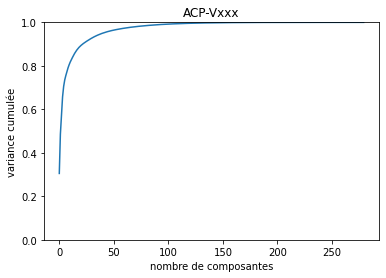

In [ ]:
train,pca = PCA_change(train, Vxx.columns,n_components=Vxx.shape[1], prefix='PCA_V_',rand_seed=4)
x=pca.explained_variance_ratio_
# dans ce premier temps on a laissé le nombre de composante par défaut aux nombre de colonnes en entrée.ce résulat est le % de la variance expliquée, 
#si ce % est suffisament grand on va dire kue cette composante explique bien la majorité de l'information  qui se trouve dans la variable d'entrée.
#Afficher le cumulé du % de var expli pour décider du nombre de composantes principale à garder, danc ce cas on garde 30 à 50 maximum 
fig, ax =plt.subplots(figsize=(6,4))
ax.plot( np.cumsum(x))
ax.set(xlabel="nombre de composantes", ylabel="variance cumulée", title="ACP-Vxxx", ylim=(0,1),)


**Exécuter ce code pour n_component = 100** 

In [ ]:
train,pca = PCA_change(train, Vxx.columns,n_components=100, prefix='PCA_V_',rand_seed=4)

In [ ]:
Vxx = test.loc[:,"V1":"V321"]  
test,pca = PCA_change(test, Vxx.columns,n_components=100, prefix='PCA_V_',rand_seed=4)